In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

In [2]:
pd.set_option('display.max_columns', None)

# Para mostrar todas las filas
pd.set_option('display.max_rows', 30)

In [3]:
defunciones= pd.read_csv("defunciones\defunciones\DEFUNCIONES_FUENTE_DEIS_1990_2021_CIFRAS_OFICIALES.csv",sep=";",encoding="latin-1" )
columnas_filtro = [
    'AÑO',
    'FECHA_DEF',
    'SEXO_NOMBRE',
    'EDAD_TIPO',
    'EDAD_CANT',
    'COD_COMUNA',
    'COMUNA',
    'NOMBRE_REGION',
    'DIAG1',
    'CAPITULO_DIAG1',
    'DIAG2',
    'LUGAR_DEFUNCION'
]
defuncion_nodupli = defunciones.drop_duplicates(subset=columnas_filtro)
defuncion_nodupli.info()

C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_13604\2355824792.py:1: DtypeWarning: Columns (9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones= pd.read_csv("defunciones\defunciones\DEFUNCIONES_FUENTE_DEIS_1990_2021_CIFRAS_OFICIALES.csv",sep=";",encoding="latin-1" )


<class 'pandas.core.frame.DataFrame'>
Index: 2921723 entries, 0 to 2923255
Data columns (total 27 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   AÑO                        int64  
 1   FECHA_DEF                  object 
 2   SEXO_NOMBRE                object 
 3   EDAD_TIPO                  float64
 4   EDAD_CANT                  int64  
 5   COD_COMUNA                 int64  
 6   COMUNA                     object 
 7   NOMBRE_REGION              object 
 8   DIAG1                      object 
 9   CAPITULO_DIAG1             object 
 10  GLOSA_CAPITULO_DIAG1       object 
 11  CODIGO_GRUPO_DIAG1         object 
 12  GLOSA_GRUPO_DIAG1          object 
 13  CODIGO_CATEGORIA_DIAG1     object 
 14  GLOSA_CATEGORIA_DIAG1      object 
 15  CODIGO_SUBCATEGORIA_DIAG1  object 
 16  GLOSA_SUBCATEGORIA_DIAG1   object 
 17  DIAG2                      object 
 18  CAPITULO_DIAG2             object 
 19  GLOSA_CAPITULO_DIAG2       object 
 20  CODIGO_

In [4]:
defuncion_nodupli["MES"] = defuncion_nodupli["FECHA_DEF"].apply(lambda x: (x[5:7]) if type(x) != float else "Nan")
defuncion_nodupli["AÑO"] = defuncion_nodupli["FECHA_DEF"].apply(lambda x: int(x[0:4]) if type(x) != float else "Nan")
defuncion_nodupli["AÑO_MES"] = defuncion_nodupli["AÑO"].astype(str) + "-" + defuncion_nodupli["MES"].astype(str)
defuncion_nodupli

C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_13604\463930738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defuncion_nodupli["MES"] = defuncion_nodupli["FECHA_DEF"].apply(lambda x: (x[5:7]) if type(x) != float else "Nan")
C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_13604\463930738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defuncion_nodupli["AÑO"] = defuncion_nodupli["FECHA_DEF"].apply(lambda x: int(x[0:4]) if type(x) != float else "Nan")
C:\Users\Unidad Academica

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,GLOSA_CATEGORIA_DIAG1,CODIGO_SUBCATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION,MES,AÑO_MES
0,1994,1994-10-22,Hombre,1.0,17,8304,Laja,Del Bíobío,8629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,966X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro,10,1994-10
1,1995,1995-04-15,Hombre,1.0,50,6115,Rengo,Del Libertador B. O'Higgins,9941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro,04,1995-04
2,1995,1995-04-09,Hombre,1.0,50,13108,Independencia,Metropolitana de Santiago,9941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,984X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro,04,1995-04
3,1995,1995-08-31,Hombre,1.0,35,8101,Concepción,Del Bíobío,8540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica,08,1995-08
4,1995,1995-09-11,Hombre,1.0,36,7301,Curicó,Del Maule,9893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica,09,1995-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923251,2021,2021-11-07,Mujer,1.0,93,13115,Lo Barnechea,Metropolitana de Santiago,E149,E00-E90,"Enfermedades endocrinas, nutricionales y metabólicas",E10-E14,Diabetes mellitus,E14,"Diabetes mellitus, no especificada",E149,DIABETES MELLITUS NO ESPECIFICADA SIN MENCIÓN DE COMPLICACIÓN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación,11,2021-11
2923252,2021,2021-10-09,Mujer,1.0,88,5402,Cabildo,De Valparaíso,B679,A00-B99,Ciertas enfermedades infecciosas y parasitarias,B65-B83,Helmintiasis,B67,Equinococosis,B679,EQUINOCOCOSIS OTRA Y LA NO ESPECIFICADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación,10,2021-10
2923253,2021,2021-11-17,Hombre,1.0,80,13104,Conchalí,Metropolitana de Santiago,I110,I00-I99,Enfermedades del sistema circulatorio,I10-I15,Enfermedades hipertensivas,I11,Enfermedad cardíaca hipertensiva,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIENCIA CARDIACA (CONGESTIVA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica,11,2021-11
2923254,2021,2021-02-03,Hombre,1.0,80,13122,Peñalolén,Metropolitana de Santiago,I120,I00-I99,Enfermedades del sistema circulatorio,I10-I15,Enfermedades hipertensivas,I12,Enfermedad renal hipertensiva,I120,ENFERMEDAD RENAL HIPERTENSIVA CON INSUFICIENCIA RENAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación,02,2021-02


In [5]:
defuncion_nodupli_gruoped = defuncion_nodupli.groupby(by="AÑO_MES").size().reset_index(name="Count")
defuncion_nodupli_gruoped["AÑO"] = defuncion_nodupli_gruoped["AÑO_MES"].apply(lambda x: int(x[0:4]) if "Nan" not in x else "Nan")
defuncion_nodupli_gruoped["AÑO"]

0      1990
1      1990
2      1990
3      1990
4      1990
       ... 
380    2021
381    2021
382    2021
383    2021
384     Nan
Name: AÑO, Length: 385, dtype: object

In [6]:
defuncion_nodupli_gruoped

,AÑO_MES,Count,AÑO
0,1990-01,6197,1990
1,1990-02,5129,1990
2,1990-03,5973,1990
3,1990-04,6167,1990
4,1990-05,8025,1990
...,...,...,...
380,2021-09,10090,2021
381,2021-10,10266,2021
382,2021-11,10132,2021
383,2021-12,10939,2021


In [7]:
defuncion_nodupli_gruoped = defuncion_nodupli_gruoped[defuncion_nodupli_gruoped["AÑO"].apply(lambda x: isinstance(x, int))]
defuncion_nodupli_gruoped

,AÑO_MES,Count,AÑO
0,1990-01,6197,1990
1,1990-02,5129,1990
2,1990-03,5973,1990
3,1990-04,6167,1990
4,1990-05,8025,1990
...,...,...,...
379,2021-08,11372,2021
380,2021-09,10090,2021
381,2021-10,10266,2021
382,2021-11,10132,2021


In [8]:
defuncion_nodupli_gruoped = defuncion_nodupli_gruoped[defuncion_nodupli_gruoped["AÑO"] > 2005]
defuncion_nodupli_gruoped

,AÑO_MES,Count,AÑO
192,2006-01,6976,2006
193,2006-02,5936,2006
194,2006-03,6708,2006
195,2006-04,6807,2006
196,2006-05,7133,2006
...,...,...,...
379,2021-08,11372,2021
380,2021-09,10090,2021
381,2021-10,10266,2021
382,2021-11,10132,2021


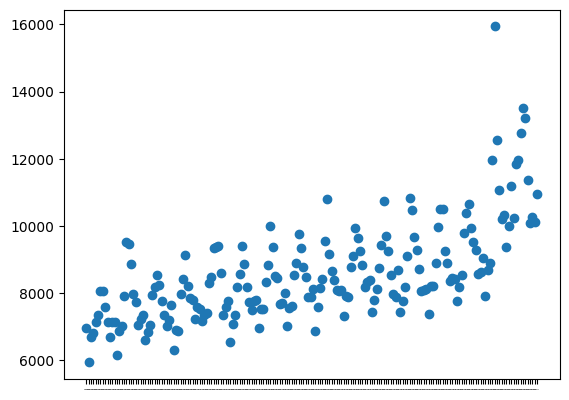

In [9]:
plt.xticks(fontsize=0)  # Tamaño de la fuente para las etiquetas del eje X
plt.scatter(data=defuncion_nodupli_gruoped, x="AÑO_MES", y="Count")

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Transformamos todos los meses de cada año a un numero

In [11]:
defuncion_nodupli_gruoped.sort_values(by="AÑO_MES").head(25)

,AÑO_MES,Count,AÑO
192,2006-01,6976,2006
193,2006-02,5936,2006
194,2006-03,6708,2006
195,2006-04,6807,2006
196,2006-05,7133,2006
197,2006-06,7338,2006
198,2006-07,8054,2006
199,2006-08,8067,2006
200,2006-09,7598,2006
201,2006-10,7150,2006


In [12]:
defuncion_simple = defuncion_nodupli_gruoped

In [13]:
defuncion_simple["AÑO_MES"].unique()

array(['2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
       '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
       '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
       '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
       '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
       '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', 

In [14]:
lista_meses = ['2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
       '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
       '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
       '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
       '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
       '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12',
       '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']

In [15]:
defuncion_simple["AÑO_MES"] = defuncion_simple["AÑO_MES"].apply(lambda x: lista_meses.index(x))
defuncion_simple

C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_13604\2920641830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defuncion_simple["AÑO_MES"] = defuncion_simple["AÑO_MES"].apply(lambda x: lista_meses.index(x))


,AÑO_MES,Count,AÑO
192,0,6976,2006
193,1,5936,2006
194,2,6708,2006
195,3,6807,2006
196,4,7133,2006
...,...,...,...
379,187,11372,2021
380,188,10090,2021
381,189,10266,2021
382,190,10132,2021


In [16]:
X = defuncion_simple[['AÑO_MES']]  # Variable independiente
Y = defuncion_simple['Count']    # Variable dependiente


In [17]:
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo
model.fit(X, Y)

# Obtener los coeficientes
slope = model.coef_[0]  # Pendiente
intercept = model.intercept_  # Intersección
print(f"Pendiente: {slope}, Intersección: {intercept}")


Pendiente: 17.306728630333946, Intersección: 6926.446999136442


In [18]:
# Realizar predicciones
predicciones = model.predict(X)

# Agregar las predicciones al DataFrame
defuncion_simple['predicciones'] = predicciones
print(defuncion_simple)


     AÑO_MES  Count   AÑO  predicciones
192        0   6976  2006   6926.446999
193        1   5936  2006   6943.753728
194        2   6708  2006   6961.060456
195        3   6807  2006   6978.367185
196        4   7133  2006   6995.673914
..       ...    ...   ...           ...
379      187  11372  2021  10162.805253
380      188  10090  2021  10180.111982
381      189  10266  2021  10197.418710
382      190  10132  2021  10214.725439
383      191  10939  2021  10232.032168

[192 rows x 4 columns]


C:\Users\Unidad Academica IMC\AppData\Local\Temp\ipykernel_13604\1830304906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defuncion_simple['predicciones'] = predicciones


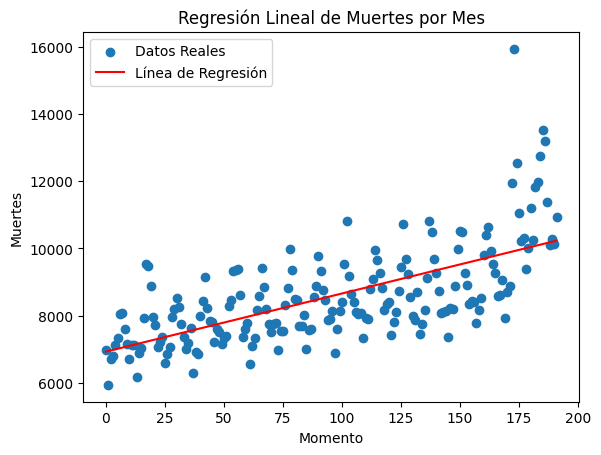

In [ ]:
plt.scatter(defuncion_nodupli_gruoped['AÑO_MES'], defuncion_nodupli_gruoped['Count'], label='Datos Reales')


plt.plot(defuncion_simple['AÑO_MES'], defuncion_simple['predicciones'], color='red', label='Línea de Regresión')

plt.xlabel("Momento")  
plt.ylabel("Muertes")  
plt.title("Regresión Lineal de Muertes por Mes")

plt.legend()

plt.show()